In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import PIL
from google.colab import drive
import zipfile
import matplotlib.pyplot as plt
import cv2

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [10]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1 / 255,
    width_shift_range=0.1,  
    height_shift_range=0.1, 
    zoom_range=0.2, 
    horizontal_flip=True,  
    brightness_range=(0.8, 1.2),  
    fill_mode='nearest'
)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

In [12]:
train_generator = train_datagen.flow_from_directory(
        'dataset_SSD_train',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=150,
        class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
        'dataset_SSD_val',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=150,
        class_mode='categorical')

Found 40800 images belonging to 51 classes.
Found 8364 images belonging to 51 classes.


In [14]:
from tensorflow.keras import layers
from tensorflow.keras import Model
import tensorflow.keras.applications

#local_weight = os.path.join('inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5')

pre_trained = tensorflow.keras.applications.InceptionResNetV2(
    input_shape=(300,300,3),
    include_top=False,
    weights="imagenet",
)


219055592/219055592 [==============================] - 1s 0us/step


In [15]:
for layer in pre_trained.layers:
    layer.trainable = False

In [16]:
model = tf.keras.models.Sequential()
model.add(pre_trained)
model.add(layers.BatchNormalization(renorm=True))
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(51, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 8, 8, 1536)       54336736  
 onal)                                                           
                                                                 
 batch_normalization_203 (Ba  (None, 8, 8, 1536)       10752     
 tchNormalization)                                               
                                                                 
 global_average_pooling2d (G  (None, 1536)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               393472    
                                                                 
 batch_normalization_204 (Ba  (None, 256)              1024      
 tchNormalization)                                      

In [19]:
h = model.fit(train_generator,
              validation_data=val_generator,
              epochs = 5,
              verbose = 1)

Epoch 1/5
272/272 [==============================] - 1468s 5s/step - loss: 1.4062 - accuracy: 0.5778 - val_loss: 0.7465 - val_accuracy: 0.7745
Epoch 2/5
272/272 [==============================] - 1438s 5s/step - loss: 0.4502 - accuracy: 0.8636 - val_loss: 0.4182 - val_accuracy: 0.8725
Epoch 3/5
272/272 [==============================] - 1433s 5s/step - loss: 0.2747 - accuracy: 0.9109 - val_loss: 0.2946 - val_accuracy: 0.9020
Epoch 4/5
272/272 [==============================] - 1434s 5s/step - loss: 0.2042 - accuracy: 0.9341 - val_loss: 0.2731 - val_accuracy: 0.8824
Epoch 5/5
272/272 [==============================] - 1467s 5s/step - loss: 0.1826 - accuracy: 0.9395 - val_loss: 0.1933 - val_accuracy: 0.9363


In [32]:
from tensorflow.keras.utils import load_img, img_to_array

tes_path = os.path.join('/content/dataset_SSD_train/3/20230505_133811copy0.jpg')
img = load_img(tes_path, target_size=(300, 300))
x = img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
yhat = model.predict(images)
yhat = np.argmax(yhat, axis=1)[0]
print(yhat)

1/1 [==============================] - 0s 134ms/step
23


In [34]:
loss_train = h.history['loss']
loss_val = h.history['val_loss']
train_acc = h.history['accuracy']
val_acc = h.history['val_accuracy']
epochs = range(1, 6)

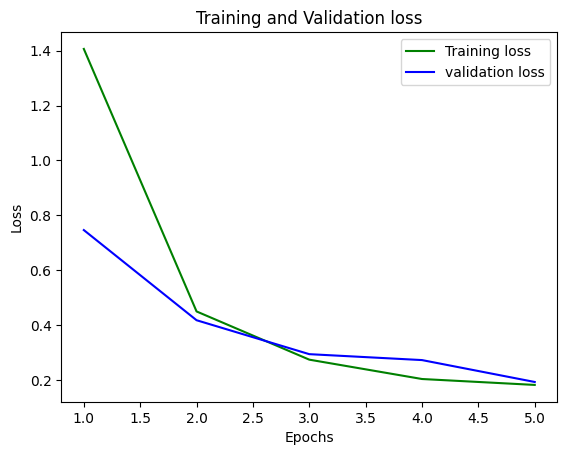

In [35]:
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

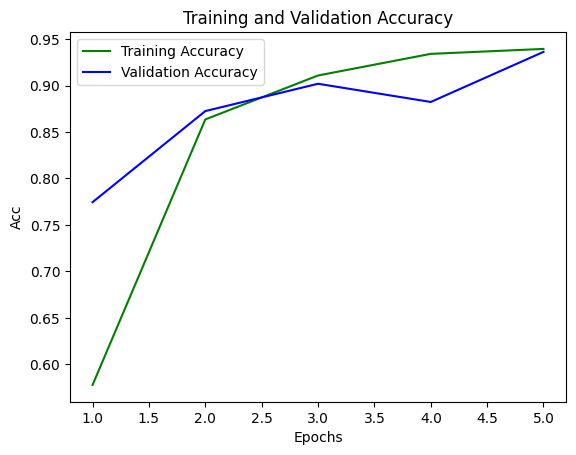

In [36]:
plt.plot(epochs, train_acc, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [20]:
model.save('model_SSD.h5')

In [4]:
os.mkdir('dataset_SSD_train')
os.mkdir('dataset_SSD_val')

In [6]:
file = zipfile.ZipFile('gdrive/MyDrive/Dataset/dataset_SSD.zip')
file.extractall()
file.close()

In [7]:
for folder in os.listdir('dataset_SSD'):
  nyimpen1 = 'dataset_SSD_train'
  nyimpen2 = 'dataset_SSD_val'
  os.mkdir(os.path.join(nyimpen1, folder))
  os.mkdir(os.path.join(nyimpen2, folder))
  for image in os.listdir(os.path.join('dataset_SSD', folder)):
    img = cv2.imread(os.path.join('dataset_SSD', folder, image))
    img = cv2.resize(img, (600,600), interpolation=cv2.INTER_AREA)
    for i in range(200):
      if i < 41:
        cv2.imwrite(os.path.join(nyimpen2, folder, image.split('.')[0] + 'copy' + str(i) + '.jpg'), img)
      cv2.imwrite(os.path.join(nyimpen1, folder, image.split('.')[0] + 'copy' + str(i) + '.jpg'), img)

In [8]:
rmdir /content/dataset_SSD_train/.ipynb_checkpoints

rmdir: failed to remove '/content/dataset_SSD_train/.ipynb_checkpoints': No such file or directory


In [9]:
rmdir /content/dataset_SSD_val/.ipynb_checkpoints

rmdir: failed to remove '/content/dataset_SSD_val/.ipynb_checkpoints': No such file or directory
